In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [18]:
df = pd.read_csv(r'C:\Users\Frank\Desktop\Proyectos Linkedin\Python Proyectos\Redes Neuronales\Perceptrón Multicapa (MLP)\Regresión\Dia 32\airline-passengers.csv')
df.head()

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 144
Total de variables disponibles (columnas) = 2 
Columnas que cuentan con un valor nulo -
month               0
total_passengers    0
dtype: int64


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             144 non-null    object
 1   total_passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [21]:
# Cambiar a datetime
df2['month'] = pd.to_datetime(df2['month'])

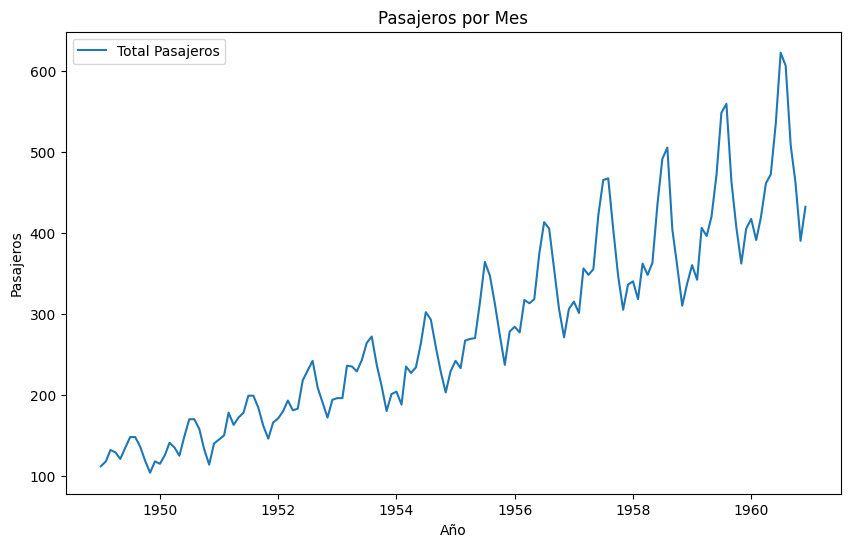

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df2['month'],df2['total_passengers'],linestyle='-')
plt.title('Pasajeros por Mes')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.legend(['Total Pasajeros'])
plt.show()

In [23]:
total_pasajeros = df2['total_passengers'].sum()
print('Total de pasajeros es de : ',total_pasajeros)
print('-'*50)
year = df2['month'].dt.year

total_pasajeros_year = df2.groupby(year)['total_passengers'].sum()

print('Total de pasajeros por año es de: ',total_pasajeros_year)

Total de pasajeros es de :  40363
--------------------------------------------------
Total de pasajeros por año es de:  month
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: total_passengers, dtype: int64


In [24]:
# df2['month_num'] = df2['month'].dt.month

# Redes Neuronales | Regresión

In [25]:
# Definir características numéricas y categóricas
numeric_features = ['total_passengers']

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [27]:
df2.head()

,month,total_passengers
0,1949-01-01,-1.407779
1,1949-02-01,-1.357590
2,1949-03-01,-1.240483
3,1949-04-01,-1.265578
4,1949-05-01,-1.332496


In [28]:
# Definir X e y
X = df2.drop(columns=['month'])
y = df2['total_passengers']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
oculta = tf.keras.layers.Dense(units=32,activation='relu',input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1,activation='linear')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])

In [31]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mean_squared_error',metrics=['accuracy'])

In [32]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [33]:
# Entrenar modelo
print('Entrenando modelo')
historial = modelo.fit(X_train,y_train,epochs=500,batch_size=16,verbose=False,validation_split=0.2,callbacks=[early_stopping])
print('Modelo Entrenado')

Entrenando modelo
Modelo Entrenado


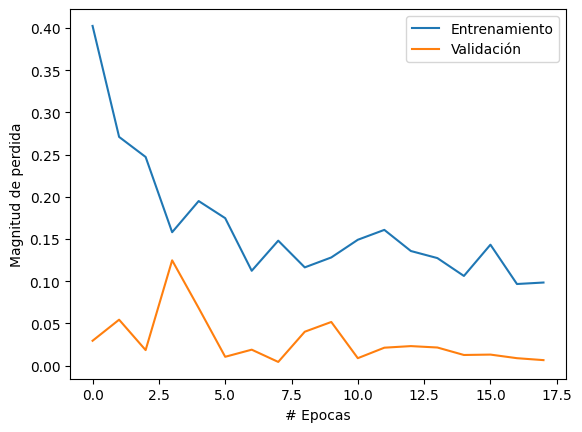

In [34]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

In [36]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :2] = scaler.transform(nuevo_dato[:, :2])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
